In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
batch_size = 128 # Number of images processed at once
nb_classes = 10  # 10 Digits from 0 to 9

# Dimensionen of the input images (28x28 pixel)
img_rows, img_cols = 28, 28

# Load image data with labels, split into test and training set 
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# reshape images in 4D tensor (N images, 28 rows, 28 columns, 1 channel) 
# rescale pixels range from [0, 255] to [0, 1]
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255
print('X_train shape: ', X_train.shape)
print(X_train.shape[0], "training samples")
print(X_test.shape[0], "test samples")

# convert digit labels (0-9) in one-hot encoded binary vectors. 
# These correspond to the training/test labels at the output of the net. 
Y_train = tf.keras.utils.to_categorical(y_train, nb_classes)
Y_test = tf.keras.utils.to_categorical(y_test, nb_classes)
print("One-hot encoding: {}".format(Y_train[0, :]))

11490434/11490434 [==============================] - 0s 0us/step
X_train shape:  (60000, 28, 28, 1)
60000 training samples
10000 test samples
One-hot encoding: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


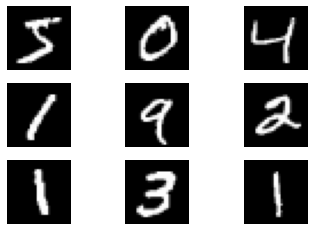

In [3]:
for i in range(9):
    plt.subplot(3,3, i+1)
    plt.imshow(X_train[i, :, :, 0], cmap='gray')
    plt.axis('off')

In [4]:
model = tf.keras.Sequential()

# Conv2D(number_filters, kernel_size, input_shape=(number_channels, img_col), padding, activation)
model.add(tf.keras.layers.Conv2D(6, (5, 5), input_shape=[img_rows, img_cols, 1], padding='same', activation='tanh'))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(16, (5, 5), padding='valid', activation='tanh'))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(120, activation='tanh'))
model.add(tf.keras.layers.Dense(84, activation='tanh'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [6]:
nb_epoch = 30 # Number of passes over all pictures of the training set

model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, 
          verbose=1, validation_data=(X_test, Y_test))

score =  model.evaluate(X_test, Y_test, verbose=0)
print('Test score', score[0])
print('Test accuracy', score[1])

Epoch 1/30
469/469 [==============================] - 10s 5ms/step - loss: 2.2798 - accuracy: 0.1542 - val_loss: 2.2584 - val_accuracy: 0.1889
Epoch 2/30
469/469 [==============================] - 2s 5ms/step - loss: 2.2328 - accuracy: 0.2477 - val_loss: 2.2099 - val_accuracy: 0.2954
Epoch 3/30
469/469 [==============================] - 2s 4ms/step - loss: 2.1847 - accuracy: 0.3573 - val_loss: 2.1597 - val_accuracy: 0.3899
Epoch 4/30
469/469 [==============================] - 2s 5ms/step - loss: 2.1339 - accuracy: 0.4225 - val_loss: 2.1060 - val_accuracy: 0.4493
Epoch 5/30
469/469 [==============================] - 2s 4ms/step - loss: 2.0789 - accuracy: 0.4726 - val_loss: 2.0475 - val_accuracy: 0.5002
Epoch 6/30
469/469 [==============================] - 2s 5ms/step - loss: 2.0188 - accuracy: 0.5248 - val_loss: 1.9834 - val_accuracy: 0.5558
Epoch 7/30
469/469 [==============================] - 2s 4ms/step - loss: 1.9533 - accuracy: 0.5689 - val_loss: 1.9139 - val_accuracy: 0.5999
Epoch

1/1 [==============================] - 0s 18ms/step


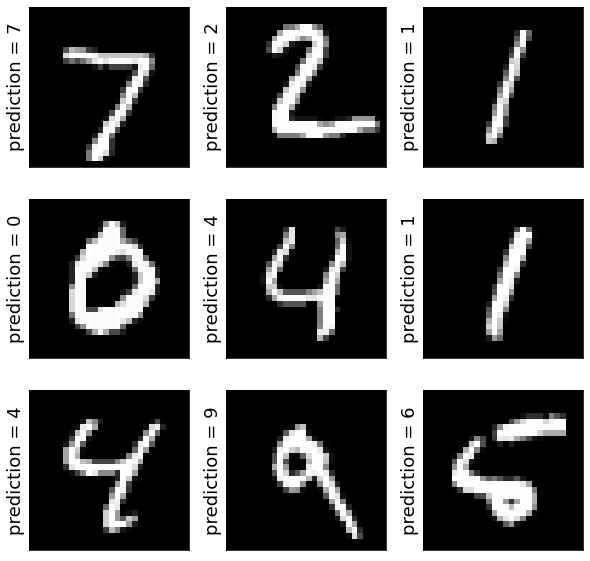

In [10]:
import numpy as np
res =np.argmax(model.predict(X_test[:9]), axis=-1)
plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[i, :, :, 0], cmap='gray')
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel("prediction = {}".format(res[i]), fontsize=18)